In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("data_IC_Design.csv")  #, season
data.head()

,公司,date,code,Q資產報酬率 (C),Q資產報酬率(A)%,Q資產報酬率(B)%,Q淨值報酬率─稅後,Q淨值報酬率─常續性利益,Q營業毛利率,Q已實現銷貨毛利率,...,Q應付帳款付現天數,Q淨營業週期 (日),Q每人營收,Q每人營業利益,Q每人配備率,Q當季季底P/E,Q當季季底股價淨值比,Q當季季底 PSR,季底普通股市值,return
0,2363 矽統,2010-09-30,2363,1.64,1.32,1.43,1.41,1.27,42.52,42.52,...,60.73,53.62,1467.0,57,1771.60,47.94,1.20,4.47,14347862.0,-0.113714
1,2379 瑞昱,2010-09-30,2379,2.95,1.68,2.63,2.47,2.40,39.16,39.16,...,94.30,69.37,2390.0,211,1848.83,16.82,2.05,1.54,35045230.0,-0.262062
2,2401 凌陽,2010-09-30,2401,2.23,1.25,1.29,1.67,0.52,36.68,36.68,...,71.77,77.98,1474.0,66,537.30,24.93,0.99,0.97,14385507.0,-0.199454
3,2436 偉詮電,2010-09-30,2436,2.12,1.94,1.88,2.33,1.95,22.88,22.88,...,73.04,96.47,2036.0,79,813.75,34.34,2.29,2.99,7058480.0,-0.218515
4,2454 聯發科,2010-09-30,2454,5.03,4.61,4.76,6.48,6.11,52.22,52.22,...,71.39,16.89,5776.0,1417,1592.54,13.54,4.35,4.03,482869709.0,-0.128308


In [3]:
data.shape

(148, 71)

In [4]:
#將財報名稱中的Q剔除

data_columns = np.array([data.columns]).reshape(len(data.columns), )

for i in range(len(data_columns)):
    if (data_columns[i][0] == "Q"):
        data_columns[i] = data_columns[i][1:]
    else:
        data_columns[i] = data_columns[i]

data.columns = data_columns

In [5]:
data.drop(["公司", "date", "code"], axis = 1, inplace = True)

In [6]:
# data["return"].hist(bins = 50, figsize = (10, 6), alpha = 0.7)
# (data["return"]).plot.kde(secondary_y = True)

![四季報酬分布圖](季節獲利分布.png)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023A532A1710>]], dtype=object)

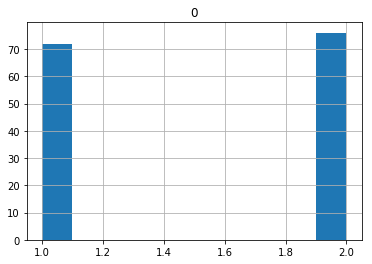

In [7]:
Return = np.array(data["return"])

##分群組
# for i in range(0, len(Return)):
#     if Return[i] < -0.03:
#         if Return[i] < -0.1:
#             Return[i] = 1
#         else:
#             Return[i] = 2
#     elif Return[i] < 0.03:
#         Return[i] = 3
#     else:
#         Return[i] = 4

for i in range(0, len(Return)):
    if Return[i] < 0.1:
        Return[i] = 1
    else:
        Return[i] =2
##看各群組數量      
pd.DataFrame(Return).hist()

In [8]:
#將return label拿掉
X = data.drop("return", axis = 1)

#將data轉成array
xx = np.zeros([len(data), 1])
for ix in X.columns:
    xx = np.append(xx, np.array(X["{}".format(ix)]).reshape(len(data), 1), axis = 1)
xx = xx[:, 1:]
X = xx

Y = Return

# Random Forest

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(X, Y, test_size = 0.3, random_state = 666)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion = "entropy", 
                             n_estimators = 10,  # 9
                             random_state = 72, 
                             max_features = 0.5, 
                             max_depth = 7,      # 4
                             min_samples_leaf = 8) 

clf.fit(x_train, y_train)
z = clf.predict(x_train)

y_predict_test = clf.predict(x_test)

from sklearn.metrics import accuracy_score

train_acc = accuracy_score(y_train, z)
test_acc = accuracy_score(y_test, y_predict_test)

print("Accuracy_train : %.2f%%" % (train_acc * 100.0),"\n"
      "Accuracy_test  : %.2f%%" % (test_acc * 100.0))

Accuracy_train : 89.32% 
Accuracy_test  : 84.44%


In [10]:
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test =  train_test_split(X, Y, test_size = 0.3, random_state = 666)

# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score

# acc_train = []
# acc_test = []

# for i in (list(range(1,11))):
#     clf = RandomForestClassifier(criterion = "entropy", 
#                              n_estimators = 9,
#                              random_state = 72, 
#                              max_features = 0.5, 
#                              max_depth = 4, 
#                              min_samples_leaf = 8) #999 → acc:0.666，#6 → acc:0.8

#     clf.fit(x_train, y_train)
#     z = clf.predict(x_train)

#     y_predict_test = clf.predict(x_test)

#     train_acc = accuracy_score(y_train, z)
#     test_acc = accuracy_score(y_test, y_predict_test)
    
#     acc_train = np.append(acc_train, train_acc)
    
#     acc_test = np.append(acc_test, test_acc)

# plt.figure(figsize = (16, 10))
# plt.plot(acc_train, label = "train_acc")
# plt.plot(acc_test, label = "test_acc")
# plt.legend()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023A5324A550>]], dtype=object)

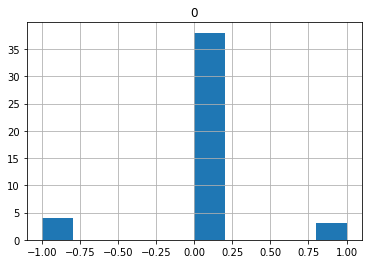

In [11]:
pd.DataFrame((y_predict_test - y_test)).hist()

In [12]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predict_test)

array([[19,  3],
       [ 4, 19]], dtype=int64)

In [13]:
#網路找到的
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes) #, rotation=45
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix
[[ 0.86363636  0.13636364]
 [ 0.17391304  0.82608696]]


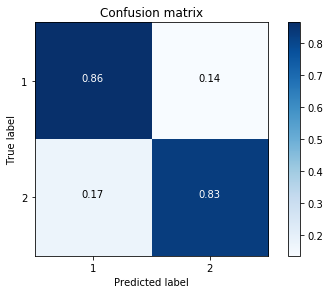

In [14]:
plot_confusion_matrix(confusion_matrix(y_test, y_predict_test), classes = ["1", "2"], normalize = True)

In [15]:
confusion_matrix(y_test, y_predict_test)

array([[19,  3],
       [ 4, 19]], dtype=int64)

In [16]:
importance = pd.DataFrame(list(zip(data.drop("return", axis = 1).columns, clf.feature_importances_)))
importance.sort_values(by = 1, ascending = False, inplace = True)
importance

,0,1
9,稅後淨利率,0.144088
41,稅後淨利變動率(單季),0.096653
37,折舊性固定資產成長率,0.058691
36,淨值成長率,0.046881
40,營業利益變動率,0.046249
39,營收變動率,0.038658
66,季底普通股市值,0.036241
32,稅後淨利成長率,0.036104
64,當季季底股價淨值比,0.030777
38,總資產報酬成長率,0.029318


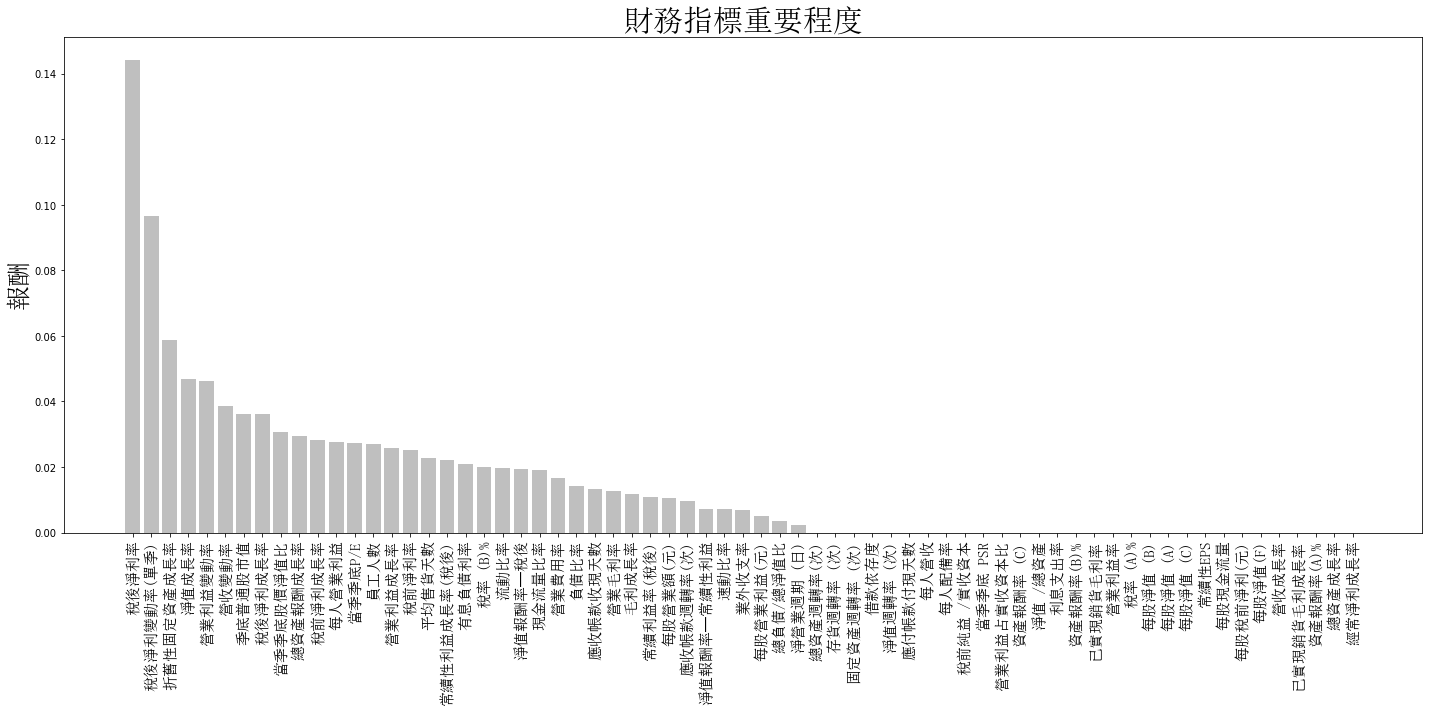

In [17]:
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\Fonts\SimSun.ttc", size=15)

objects = importance[0].values
y_pos = np.arange(len(objects))
performance = importance[1]

plt.figure(figsize = (20, 10))
plt.bar(y_pos, performance, align='center', alpha=0.5, color = "grey")
plt.xticks(y_pos, objects, rotation = 90, fontproperties=font)
plt.ylabel(u'報酬', fontproperties=font, size = 25)
plt.title('財務指標重要程度', fontproperties=font, size = 30)
plt.tight_layout()
plt.show()

In [18]:
sum(importance[1])

1.0

In [19]:
data_new = pd.read_csv("data_IC_Design_new.csv")

company_list = np.array([data_new["公司"]]).reshape(len(data_new["公司"]), )
company_code = np.array([data_new["code"]]).reshape(len(data_new["code"]), )

data_new.drop(["公司", "date", "code"], axis = 1, inplace = True)

xx = np.zeros([len(data_new), 1])
for ix in data_new.columns:
    xx = np.append(xx, np.array(data_new["{}".format(ix)]).reshape(len(data_new), 1), axis = 1)
xx = xx[:, 1:]
X = xx

recommand_list_random_forest = pd.DataFrame(list(zip(company_list, company_code, clf.predict(X))))
recommand_list_random_forest = recommand_list_random_forest[recommand_list_random_forest[2] == 2]
recommand_list_random_forest

,0,1,2
0,2379 瑞昱,2379,2.0
1,2401 凌陽,2401,2.0
2,2436 偉詮電,2436,2.0
3,2454 聯發科,2454,2.0
4,2458 義隆,2458,2.0
5,3006 晶豪科,3006,2.0
7,3035 智原,3035,2.0
8,3257 虹冠電,3257,2.0
9,3443 創意,3443,2.0
10,3545 敦泰,3545,2.0


# XGBoost

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv("data_IC_Design.csv")
data.drop(["公司", "date", "code"], axis = 1, inplace = True)
Return = np.array(data["return"])

# for i in range(0, len(Return)):
#     if Return[i] < -0.03:
#         if Return[i] < -0.1:
#             Return[i] = 1
#         else:
#             Return[i] = 2
#     elif Return[i] < 0.03:
#         Return[i] = 3
#     else:
#         Return[i] = 4

for i in range(0, len(Return)):
    if Return[i] < 0.1:
        Return[i] = 1
    else:
        Return[i] =2
        
X = data.drop("return", axis = 1)
xx = np.zeros([len(data), 1])
for ix in X.columns:
    xx = np.append(xx, np.array(X["{}".format(ix)]).reshape(len(data), 1), axis = 1)
xx = xx[:, 1:]
X = xx

Y = Return

#將財報名稱中的 "Q" 剔除

data_columns = np.array([data.columns]).reshape(len(data.columns), )

for i in range(len(data_columns)):
    if (data_columns[i][0] == "Q"):
        data_columns[i] = data_columns[i][1:]
    else:
        data_columns[i] = data_columns[i]

data.columns = data_columns

In [21]:
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(X, Y, test_size = 0.3, random_state = 666)

clf = XGBClassifier(criterion = "entropy", 
                             n_estimators = 6,
                             random_state = 6, 
                             max_features = 0.5, 
                             max_depth = 8, 
                             min_samples_leaf = 8, 
                             learning_rate = 0.1,
                             booster = "gbtree",   #用linear→69%, 71%，且2,2猜狠準,
                             gamma = 6  #設1 → 77%但有overfitting問題
                             )

clf.fit(x_train, y_train)

z = clf.predict(x_train)
y_predict_test = clf.predict(x_test)

from sklearn.metrics import accuracy_score

train_acc = accuracy_score(y_train, z)
test_acc = accuracy_score(y_test, y_predict_test)

print("Accuracy_train : %.2f%%" % (train_acc * 100.0),"\n"
      "Accuracy_test  : %.2f%%" % (test_acc * 100.0))

Accuracy_train : 82.52% 
Accuracy_test  : 77.78%


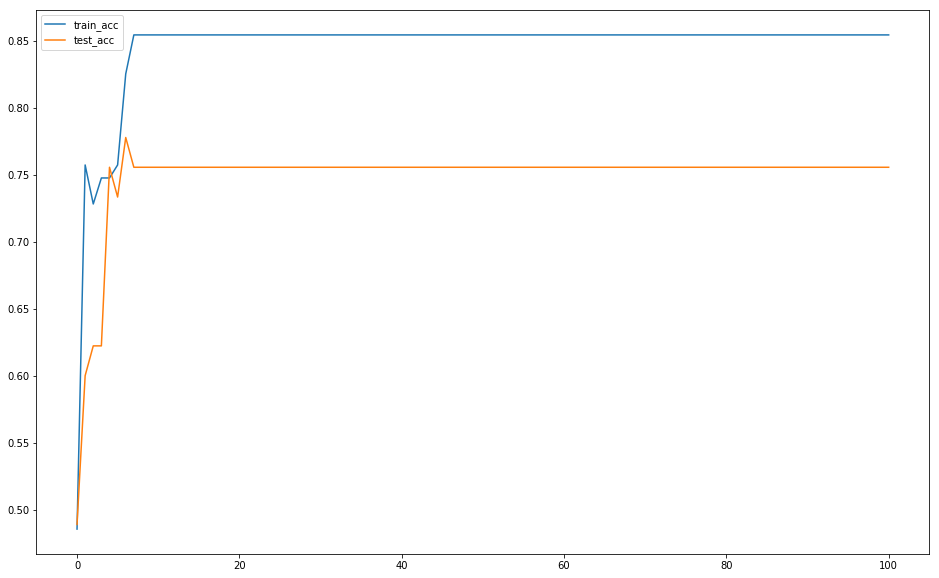

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(X, Y, test_size = 0.3, random_state = 666)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

acc_train = []
acc_test = []

for i in (range(0, 101)):
    clf = XGBClassifier(criterion = "entropy", 
                             n_estimators = i,
                             random_state = 6, 
                             max_features = 0.5, 
                             max_depth = 8, 
                             min_samples_leaf = 8, 
                             learning_rate = 0.1,
                             booster = "gbtree",   #用linear→69%, 71%，且2,2猜狠準,
                             gamma = 6  #設1 → 77%但有overfitting問題
                             )

    clf.fit(x_train, y_train)
    z = clf.predict(x_train)

    y_predict_test = clf.predict(x_test)

    train_acc = accuracy_score(y_train, z)
    test_acc = accuracy_score(y_test, y_predict_test)
    
    acc_train = np.append(acc_train, train_acc)
    
    acc_test = np.append(acc_test, test_acc)

plt.figure(figsize = (16, 10))
plt.plot(acc_train, label = "train_acc")
plt.plot(acc_test, label = "test_acc")
plt.legend()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023A559C8BE0>]], dtype=object)

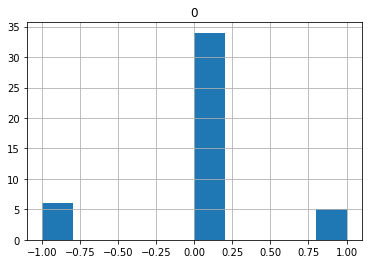

In [23]:
pd.DataFrame((y_predict_test - y_test)).hist()

In [24]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predict_test)

array([[17,  5],
       [ 6, 17]], dtype=int64)

Normalized confusion matrix
[[ 0.77272727  0.22727273]
 [ 0.26086957  0.73913043]]


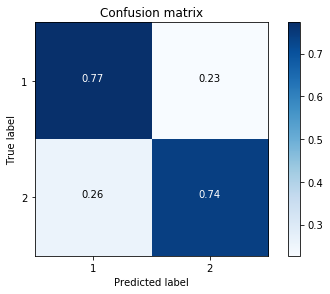

In [25]:
plot_confusion_matrix(confusion_matrix(y_test, y_predict_test), classes = ["1", "2"], normalize = True)

In [26]:
importance = pd.DataFrame(list(zip(data.drop("return", axis = 1).columns, clf.feature_importances_)))
importance.sort_values(by = 1, ascending = False, inplace = True)
importance[importance[1] > 0]

,0,1
9,稅後淨利率,0.20
38,總資產報酬成長率,0.10
36,淨值成長率,0.10
37,折舊性固定資產成長率,0.05
53,應收帳款收現天數,0.05
41,稅後淨利變動率(單季),0.05
40,營業利益變動率,0.05
61,每人營業利益,0.05
60,每人營收,0.05
62,每人配備率,0.05


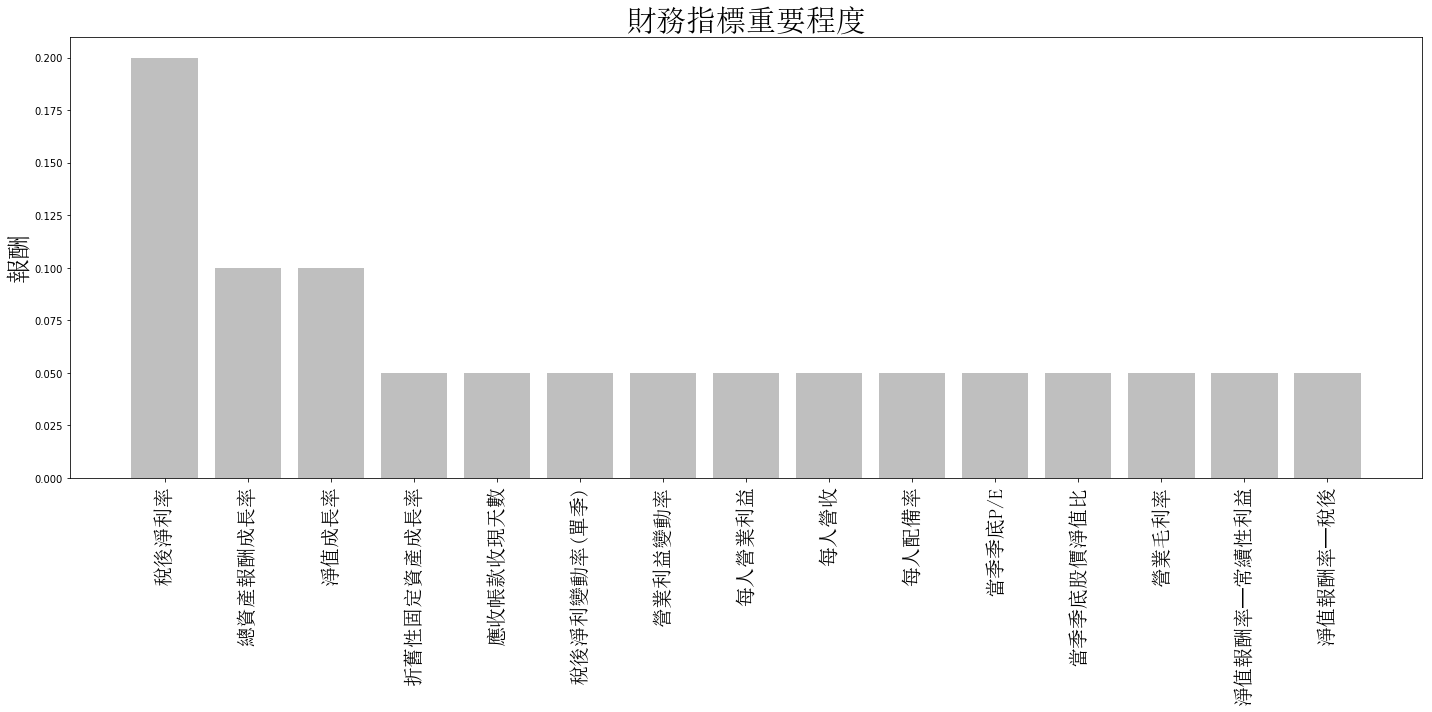

In [27]:
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\Fonts\SimSun.ttc", size=20)

objects = importance[0][importance[1] > 0].values
y_pos = np.arange(len(objects))
performance = importance[1][importance[1] > 0]

plt.figure(figsize = (20, 10))
plt.bar(y_pos, performance, align='center', alpha=0.5, color = "grey")
plt.xticks(y_pos, objects, rotation = 90, fontproperties=font)
plt.ylabel(u'報酬', fontproperties=font, size = 25)
plt.title('財務指標重要程度', fontproperties=font, size = 30)
plt.tight_layout()
plt.show()

In [28]:
sum(importance[1])

1.0000000149011612

In [29]:
data_new = pd.read_csv("data_IC_Design_new.csv")

company_list = np.array([data_new["公司"]]).reshape(len(data_new["公司"]), )
company_code = np.array([data_new["code"]]).reshape(len(data_new["code"]), )

data_new.drop(["公司", "date", "code"], axis = 1, inplace = True)

xx = np.zeros([len(data_new), 1])
for ix in data_new.columns:
    xx = np.append(xx, np.array(data_new["{}".format(ix)]).reshape(len(data_new), 1), axis = 1)
xx = xx[:, 1:]
X = xx

recommand_list_xgboost = pd.DataFrame(list(zip(company_list, company_code, clf.predict(X))))
recommand_list_xgboost = recommand_list_xgboost[recommand_list_xgboost[2] == 2]
recommand_list_xgboost

,0,1,2
0,2379 瑞昱,2379,2.0
1,2401 凌陽,2401,2.0
2,2436 偉詮電,2436,2.0
3,2454 聯發科,2454,2.0
4,2458 義隆,2458,2.0
5,3006 晶豪科,3006,2.0
6,3034 聯詠,3034,2.0
7,3035 智原,3035,2.0
9,3443 創意,3443,2.0
10,3545 敦泰,3545,2.0


In [30]:
recommand_list_random_forest

,0,1,2
0,2379 瑞昱,2379,2.0
1,2401 凌陽,2401,2.0
2,2436 偉詮電,2436,2.0
3,2454 聯發科,2454,2.0
4,2458 義隆,2458,2.0
5,3006 晶豪科,3006,2.0
7,3035 智原,3035,2.0
8,3257 虹冠電,3257,2.0
9,3443 創意,3443,2.0
10,3545 敦泰,3545,2.0


In [31]:
pd.merge(recommand_list_random_forest, recommand_list_xgboost, how = "inner", on = 0)

,0,1_x,2_x,1_y,2_y
0,2379 瑞昱,2379,2.0,2379,2.0
1,2401 凌陽,2401,2.0,2401,2.0
2,2436 偉詮電,2436,2.0,2436,2.0
3,2454 聯發科,2454,2.0,2454,2.0
4,2458 義隆,2458,2.0,2458,2.0
5,3006 晶豪科,3006,2.0,3006,2.0
6,3035 智原,3035,2.0,3035,2.0
7,3443 創意,3443,2.0,3443,2.0
8,3545 敦泰,3545,2.0,3545,2.0
9,3588 通嘉,3588,2.0,3588,2.0
